In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

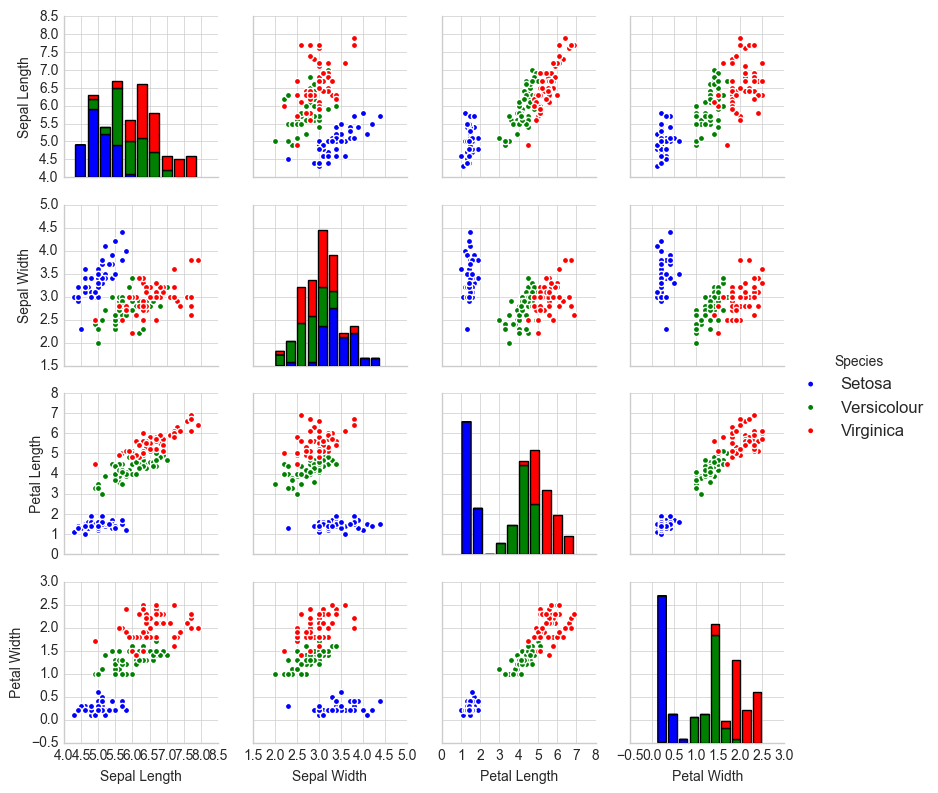

In [3]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'
iris_target['Species'] =  iris_target['Species'].apply(flower)
iris_target.tail()
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()
sns.pairplot(iris,hue='Species',size=2)

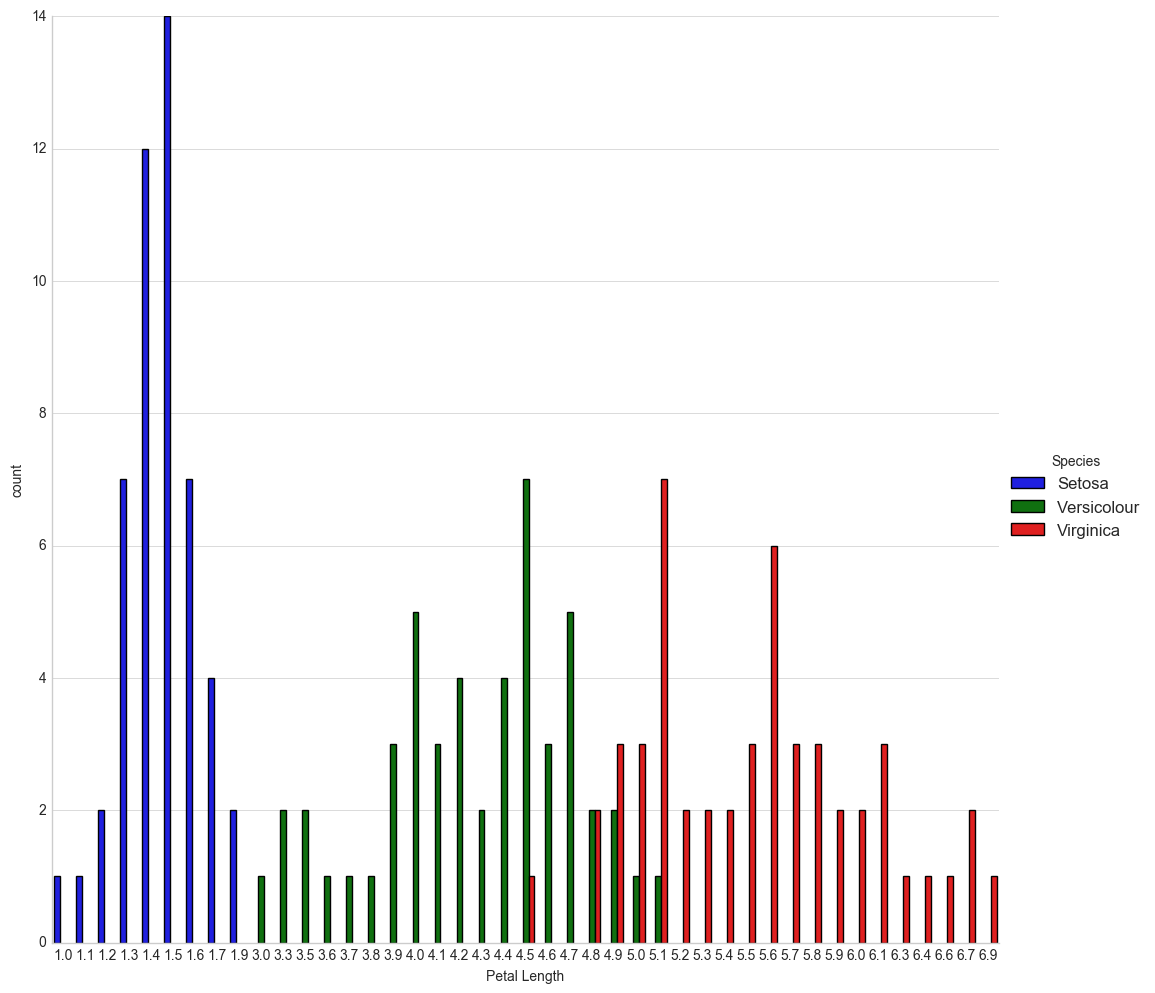

In [5]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind='count') from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/home/user/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [8]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
from sklearn import metrics

In [10]:
Y_pred = logreg.predict(X_test)

In [11]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.933333333333


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [14]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [15]:
Y_pred = knn.predict(X_test)

In [16]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.95


In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print (metrics.accuracy_score(Y_test,Y_pred))

0.966666666667


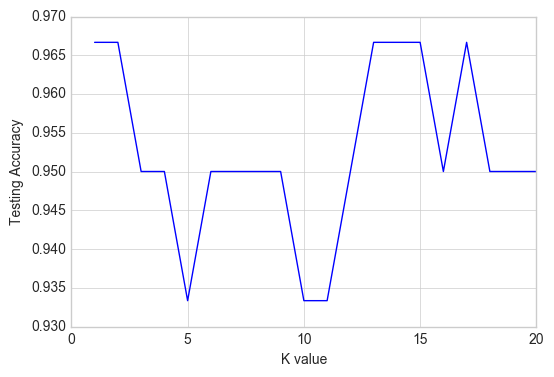

In [19]:
k_range = range(1,21)

accuracy = []
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')